In [1]:
import numpy
from keras import backend as K

from keras.datasets import mnist
from keras.utils import np_utils

from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
import pandas as pd

In [3]:
model = Sequential()

In [4]:
K.set_image_data_format('channels_last')
numpy.random.seed(0)

In [5]:
X = pd.read_csv('C:/Users/pjiang/Desktop/data/digit-recognizer/train.csv')

In [6]:
test = pd.read_csv('C:/Users/pjiang/Desktop/data/digit-recognizer/test.csv')

In [7]:
X.shape

(42000, 785)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
y = X["label"]
X.drop(["label"], inplace=True, axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

In [11]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28,28,1).astype('float32')

# Data Exploration

In [12]:
import matplotlib.pyplot as plt

In [13]:
print('The number of training examples = %i' % X_train.shape[0])
print('The number of classes = %i' %len(numpy.unique(y_train)))
print('Dimention of images = {:d} x {:d} '.format(X_train[1].shape[0], X_train[1].shape[1]))

unique, count = numpy.unique(y_train, return_counts= True)
print("The number of occurance of each class in the dataset = %s" % dict(zip(unique, count)), "\n")


The number of training examples = 33600
The number of classes = 10
Dimention of images = 28 x 28 
The number of occurance of each class in the dataset = {0: 3316, 1: 3775, 2: 3331, 3: 3414, 4: 3233, 5: 3093, 6: 3352, 7: 3508, 8: 3228, 9: 3350} 



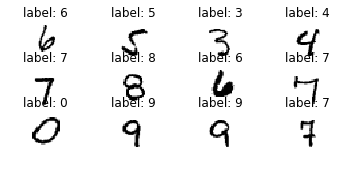

In [14]:
images_and_labels = list(zip(X_train, y_train))

for index, (image, label) in enumerate(images_and_labels[:12]):
    plt.subplot(5,4, index+1)
    plt.axis('off')
    plt.imshow(image.squeeze(), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('label: %i' %label)

In [15]:
from keras.layers import Dropout

In [16]:
model.add(Conv2D(32, kernel_size=5, padding="same", input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(64, kernel_size=5, padding="same", activation = "relu"))
model.add(Conv2D(218, kernel_size=5, padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))

model.add(Conv2D(512, kernel_size=5, padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(1,1)))


Instructions for updating:
Colocations handled automatically by placer.


In [17]:
from keras.layers.core import Activation

model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.3))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [19]:
model.add(Dense(10))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])